# Regressor2(SVR Regressor rbf、Ensemble regressor)

### 非線形データの場合 → SVR Regressor rbf、Ensemble regressor

### 参考 :  
SVR Regressor rbf : http://neuro-educator.com/ml19/  
Ensemble regressor : http://neuro-educator.com/ml20/

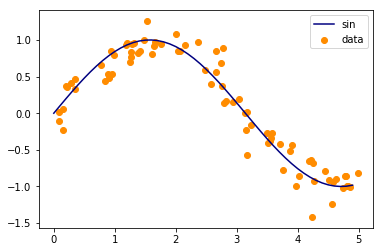

In [10]:
# 1：ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import cross_validation, preprocessing, linear_model, svm, ensemble, tree #機械学習用のライブラリを利用
 
# 2：データの生成--------------------------------
# Generate sample data
numSamples=80
x = np.sort(5 * np.random.rand(numSamples, 1), axis=0)
y = np.sin(x).ravel()
y= y + 0.2 * (np.random.randn(numSamples))
x_true=np.arange(0, 5.0, 0.1) # 3から10まで1刻み
y_true = np.sin(x_true).ravel()

%matplotlib inline
plt.scatter(x, y, color='darkorange', label='data')
plt.plot(x_true, y_true, color='navy', label='sin')
plt.legend()
plt.show()

# SVR rbf

SVRに関してはclassification1を参考

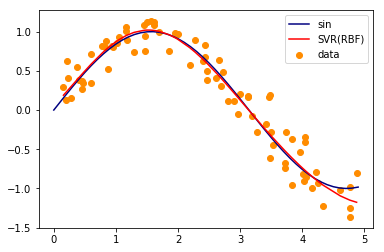

In [8]:
# 3：SVR rbfを適用する--------------------------------
clf_svr = svm.SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)
# カーネルはrbfを指定、Cはペナルティ項の係数、gammaはrbfカーネルの定数、epsilonは回帰直線からどれだけ離れたらペナルティをかけるかを指定

clf_svr.fit(x, y)
y_rbf = clf_svr.fit(x, y).predict(x)

plt.scatter(x, y, color='darkorange', label='data')
plt.plot(x_true, y_true, color='navy', label='sin')
plt.plot(x, y_rbf, color='red', label='SVR(RBF)')
plt.legend()
plt.show()

詳しい使い方はこちら  
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR

---

# Ensemble regressor

Ensembleに関してはClassification2を参照

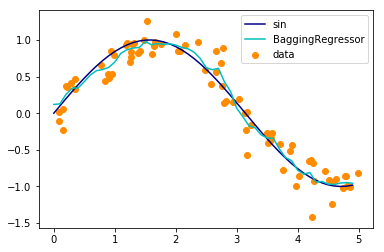

In [11]:
# 解説3：BaggingRegressorを適用する--------------------------------
reg = ensemble.BaggingRegressor(tree.DecisionTreeRegressor(), n_estimators=100, max_samples=0.3)
x_true=x_true.reshape((-1, 1))
y_reg = reg.fit(x, y).predict(x_true.reshape(-1, 1))
 
# 4：プロットしてみる------------------------------------------
%matplotlib inline
 
plt.scatter(x, y, color='darkorange', label='data')
plt.plot(x_true, y_true, color='navy', label='sin')
plt.plot(x_true, y_reg, color='c', label='BaggingRegressor')
plt.legend()
plt.show()

詳しい使い方はこちら  
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

---